In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

## Initial EDA (Size, Columns, Type of vars)

In [32]:
zf = zipfile.ZipFile('train.zip')
df = pd.read_csv(zf.open('train.csv'))

In [33]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [35]:
df.isnull().sum()[0]

0

### Conclusion 1 => Format, data are correct (They has been pre-cleaned).
- Column names are correct and lowercase
- There aren't missing values
- There aren't categorical values then need a transformation


In [36]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


c:\Users\Javier\anaconda3\envs\ml-zoomcamp\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of trip duration(secs) in log scale')

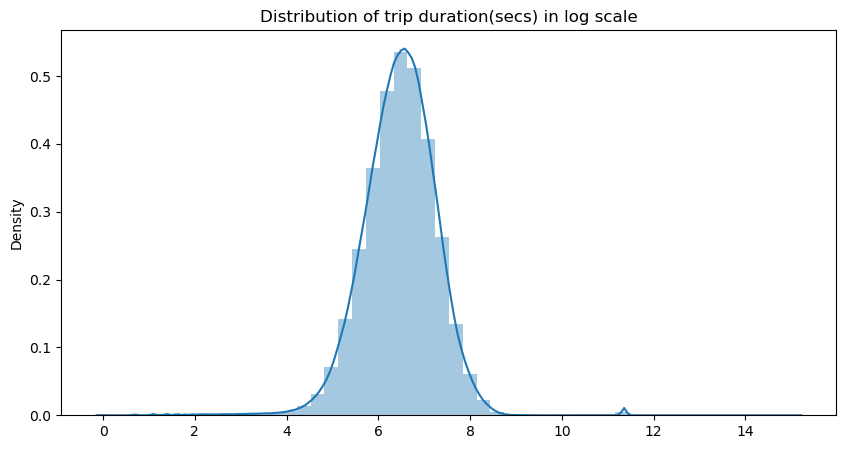

In [37]:
plt.figure(figsize = (10,5))
sns.distplot(np.log(df.trip_duration.values)).set_title('Distribution of trip duration')
plt.title('Distribution of trip duration(secs) in log scale')

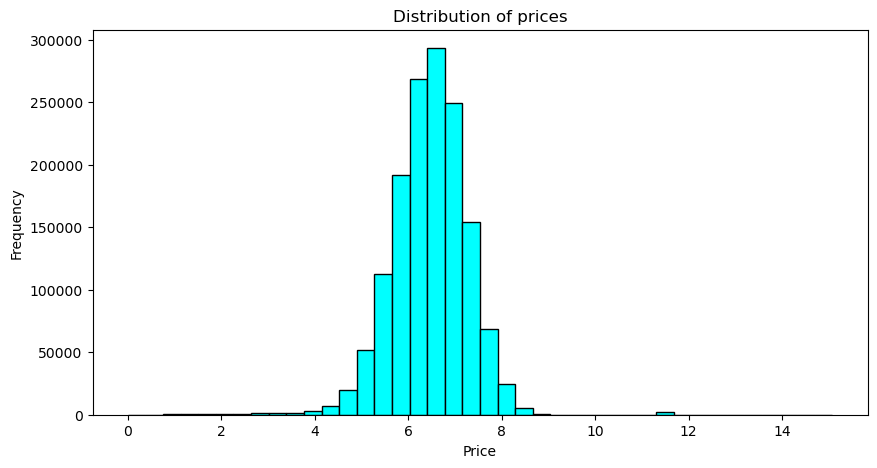

In [38]:
plt.figure(figsize=(10, 5))

sns.histplot(np.log(df.trip_duration.values), bins=40, color='cyan', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

In [39]:
df[df.pickup_latitude == 0].count()[0]


0

In [40]:
df[df.pickup_longitude == 0].count()[0]

0

In [41]:
df[df.trip_duration == 0].count()[0]

0

In [42]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)


In [43]:
# Splits train,val,test and extracts target
from sklearn.model_selection import train_test_split

def split_dataframe(dataframe): 
  df_full_train, df_test = train_test_split(dataframe, test_size=0.2, random_state=1)
  df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

  df_full_train = df_full_train.reset_index(drop=True)
  df_train = df_train.reset_index(drop=True)
  df_val = df_val.reset_index(drop=True)
  df_test = df_test.reset_index(drop=True)

  y_train = df_train.trip_duration.values
  y_val = df_val.trip_duration.values
  y_test = df_test.trip_duration.values

  return df_full_train, df_train, df_val, df_test, y_train, y_val, y_test

  # df_train.drop(columns=['trip_duration'], inplace=True)
  # df_val.drop(columns=['trip_duration'], inplace=True)

### Metrics to use

In [44]:
import sklearn.metrics
from sklearn.metrics import r2_score

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

def rmsle(y, y_pred):
    error = np.log1p(y_pred) - np.log1p(y)
    msle = (error ** 2).mean()
    return np.sqrt(msle)

def mae(y, y_pred):
    error = abs(y_pred - y)
    return error.mean()


## Linear Regression

In [45]:
from sklearn import linear_model
from sklearn.feature_extraction import DictVectorizer

# Function to calculate Linear Regression model
def LG_calculate(features, apply_log=False):

  # OHE
  dv = DictVectorizer(sparse=False)
  train_dict = df_train[features].to_dict(orient='records')
  X_train = dv.fit_transform(train_dict)
  val_dict = df_val[features].to_dict(orient='records')
  X_val = dv.transform(val_dict)

  if apply_log:
    y_train_m = np.log1p(y_train)
  else:
    y_train_m = y_train

  model = linear_model.LinearRegression()
  model.fit(X_train, y_train_m)

  y_pred_train = model.predict(X_train)
  y_pred_val = model.predict(X_val)

  if apply_log:
    y_pred_train = np.exp(y_pred_train) - 1
    y_pred_val = np.exp(y_pred_val) - 1

  # To avoid values < 0 in RMSLE calculation
  y_pred_train = np.where(y_pred_train < 0, 0, y_pred_train)
  y_pred_val = np.where(y_pred_val < 0, 0, y_pred_val)

  # Calculates and prints metrics
  print('RMSLE train: ',round(rmsle(y_train, y_pred_train),4), ' RMSLE val: ',round(rmsle(y_val, y_pred_val),4))

In [46]:
df.vendor_id = df.vendor_id.astype(str)
df_full_train, df_train, df_val, df_test, y_train, y_val, y_test = split_dataframe(df)

In [47]:
features = ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
            'dropoff_longitude', 'dropoff_latitude']
#features = ['passenger_count', 'pickup_longitude', 'pickup_latitude',
#            'dropoff_longitude', 'dropoff_latitude']
LG_calculate(features, False)
print("Using logarithms")
LG_calculate(features, True)

RMSLE train:  0.8552  RMSLE val:  0.8545
Using logarithms
RMSLE train:  0.7704  RMSLE val:  0.7659


### Feature engineering

In [48]:
# Extract month, weekday an hour from pickup_datetime. Se convierten en str para que se reconozcan como variables categóricas en OHE
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)
df['month'] = df.pickup_datetime.dt.month.astype(str)
df['weekday'] = df.pickup_datetime.dt.weekday.astype(str)
df['hour'] = df.pickup_datetime.dt.hour.astype(str)
df_full_train, df_train, df_val, df_test, y_train, y_val, y_test = split_dataframe(df)

In [49]:
features = ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
            'dropoff_longitude', 'dropoff_latitude', 'month',
            'weekday', 'hour']
LG_calculate(features, False)
print("Using logarithms")
LG_calculate(features, True)

RMSLE train:  0.8471  RMSLE val:  0.8467
Using logarithms
RMSLE train:  0.7621  RMSLE val:  0.7574


In [50]:
# Functions to calculate Haversine distance & Compass direction
def hDistance(lat1, lng1, lat2, lng2):
  lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
  R = 6371 #Earth radius
  lat = lat2 - lat1
  lng = lng2 - lng1
  d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
  h = 2 * R * np.arcsin(np.sqrt(d))
  return h

def cDirection(lat1, lng1, lat2, lng2):
  lng_delta_rad = np.radians(lng2 - lng1)
  lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
  y = np.sin(lng_delta_rad) * np.cos(lat2)
  x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
  return np.degrees(np.arctan2(y, x))

In [51]:
df['hdistance'] = hDistance(df.pickup_latitude.values, df.pickup_longitude.values, df.dropoff_latitude.values, df.dropoff_longitude.values)
df['cdirection'] = cDirection(df.pickup_latitude.values, df.pickup_longitude.values, df.dropoff_latitude.values, df.dropoff_longitude.values)
df_full_train, df_train, df_val, df_test, y_train, y_val, y_test = split_dataframe(df)

In [52]:
features = ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
            'dropoff_longitude', 'dropoff_latitude', 'month',
            'weekday', 'hour', 'hdistance', 'cdirection']
LG_calculate(features, False)
print("Using logarithms")
LG_calculate(features, True)

RMSLE train:  0.666  RMSLE val:  0.6653
Using logarithms
RMSLE train:  0.6227  RMSLE val:  0.693


In [53]:
features = ['hdistance']
LG_calculate(features, False)
print("Using logarithms")
LG_calculate(features, True)

RMSLE train:  0.6799  RMSLE val:  0.6781
Using logarithms
RMSLE train:  0.6439  RMSLE val:  0.6851


## Decision Tree

In [54]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

def DT_calculate(features, max_d=None, apply_log=False):

  X_train = df_train[features].values
  X_val = df_val[features].values

  if apply_log:
    y_train_m = np.log1p(y_train)
  else:
    y_train_m = y_train

  model = DecisionTreeRegressor(max_depth=max_d, random_state=1)
  model.fit(X_train, y_train_m)

  y_pred_train = model.predict(X_train)
  y_pred_val = model.predict(X_val)

  if apply_log:
    y_pred_train = np.exp(y_pred_train) - 1
    y_pred_val = np.exp(y_pred_val) - 1

  # To avoid values < 0 in RMSLE calculation
  y_pred_train = np.where(y_pred_train < 0, 0, y_pred_train)
  y_pred_val = np.where(y_pred_val < 0, 0, y_pred_val)

  # Calculates and prints metrics
  print('RMSLE train: ',round(rmsle(y_train, y_pred_train),4), ' RMSLE val: ',round(rmsle(y_val, y_pred_val),4))  
   
  # Feature importances
  print('Feature importances')
  for n,value in enumerate(features):
    print(features[n],': ',model.feature_importances_[n])
    
  # Tree
  print('DecisionTree')
  print(export_text(model, feature_names=features))

  return(round(rmsle(y_val, y_pred_val),4), model)

In [55]:
# Reloading the dataset (for remove OHE adaptations because Tree-based models work better without OHE)
zf = zipfile.ZipFile('train.zip')
df = pd.read_csv(zf.open('train.csv'))

df.pickup_datetime = pd.to_datetime(df.pickup_datetime)
df['month'] = df.pickup_datetime.dt.month
df['weekday'] = df.pickup_datetime.dt.weekday
df['hour'] = df.pickup_datetime.dt.hour
df['hdistance'] = hDistance(df.pickup_latitude.values, df.pickup_longitude.values, df.dropoff_latitude.values, df.dropoff_longitude.values)
df['cdirection'] = cDirection(df.pickup_latitude.values, df.pickup_longitude.values, df.dropoff_latitude.values, df.dropoff_longitude.values)

df_full_train, df_train, df_val, df_test, y_train, y_val, y_test = split_dataframe(df)

In [56]:
features = ['vendor_id','passenger_count', 'pickup_longitude', 'pickup_latitude',
            'dropoff_longitude', 'dropoff_latitude', 'month',
            'weekday', 'hour', 'hdistance', 'cdirection']
DT_calculate(features, 10, False)
print("Using logarithms...")
DT_calculate(features, 10, True)

RMSLE train:  0.5646  RMSLE val:  0.5688
Feature importances
vendor_id :  0.0009262925810959626
passenger_count :  0.0008811554609339884
pickup_longitude :  0.004772779905351987
pickup_latitude :  0.016745962296204796
dropoff_longitude :  0.006457259579825923
dropoff_latitude :  0.008160536585725643
month :  0.0006496927078031524
weekday :  0.0006244331098165125
hour :  0.3851535651885901
hdistance :  0.5650121333816043
cdirection :  0.010616189203047651
DecisionTree
|--- hdistance <= 4.16
|   |--- hdistance <= 1.62
|   |   |--- vendor_id <= 1.50
|   |   |   |--- hdistance <= 1.06
|   |   |   |   |--- hdistance <= 0.82
|   |   |   |   |   |--- dropoff_latitude <= 40.77
|   |   |   |   |   |   |--- hour <= 7.50
|   |   |   |   |   |   |   |--- hdistance <= 0.01
|   |   |   |   |   |   |   |   |--- hdistance <= 0.00
|   |   |   |   |   |   |   |   |   |--- passenger_count <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- value: [155.71]
|   |   |   |   |   |   |   |   |   |--- passeng

(0.4444, DecisionTreeRegressor(max_depth=10, random_state=1))

## Random Forest

In [57]:
from sklearn.ensemble import RandomForestRegressor

def RF_calculate(features, n_est=100, max_d=None, apply_log=False):

  X_train = df_train[features].values
  X_val = df_val[features].values

  if apply_log:
    y_train_m = np.log1p(y_train)
  else:
    y_train_m = y_train

  model = RandomForestRegressor(n_estimators=n_est, max_depth=max_d, random_state=1, n_jobs=-1)
  model.fit(X_train, y_train_m)

  y_pred_train = model.predict(X_train)
  y_pred_val = model.predict(X_val)

  if apply_log:
    y_pred_train = np.exp(y_pred_train) - 1
    y_pred_val = np.exp(y_pred_val) - 1

  # To avoid values < 0 in RMSLE calculation
  y_pred_train = np.where(y_pred_train < 0, 0, y_pred_train)
  y_pred_val = np.where(y_pred_val < 0, 0, y_pred_val)

  # Calculates and prints metrics
  print('RMSLE train: ',round(rmsle(y_train, y_pred_train),4), ' RMSLE val: ',round(rmsle(y_val, y_pred_val),4))  
   
  # Feature importances
  print('Feature importances')
  for n,value in enumerate(features):
    print(features[n],': ',model.feature_importances_[n])

  return(round(rmsle(y_val, y_pred_val),4), model)

In [58]:
features = ['vendor_id','passenger_count', 'pickup_longitude', 'pickup_latitude',
            'dropoff_longitude', 'dropoff_latitude', 'month',
            'weekday', 'hour', 'hdistance', 'cdirection']
RF_calculate(features, 100, 10, False)
print("Using logarithms...")
RF_calculate(features, 100, 10, True)

RMSLE train:  0.5538  RMSLE val:  0.5682
Feature importances
vendor_id :  0.0019300447501997614
passenger_count :  0.0028666065706886355
pickup_longitude :  0.02785179566699555
pickup_latitude :  0.232087972798112
dropoff_longitude :  0.020615215461412255
dropoff_latitude :  0.03582928118982413
month :  0.013535522345659835
weekday :  0.004383565366312268
hour :  0.1232761175499509
hdistance :  0.33363403582230045
cdirection :  0.2039898424785442
Using logarithms...
RMSLE train:  0.4272  RMSLE val:  0.4339
Feature importances
vendor_id :  0.00854074077948306
passenger_count :  0.000814271834439206
pickup_longitude :  0.0038396217767034274
pickup_latitude :  0.003649774056207383
dropoff_longitude :  0.004575646991431095
dropoff_latitude :  0.029344005787975833
month :  0.0007314607075130603
weekday :  0.014589768247233355
hour :  0.04983911297084557
hdistance :  0.856475885344433
cdirection :  0.027599711503735084


(0.4339, RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=1))

## XGBoost

In [59]:
import xgboost as xgb

def XGB_calculate(features, xgb_params, num_boost=100, apply_log=False, print_results=True, df_v=df_val, y_v=y_val):

  print('ETA: ', xgb_params['eta'], 'max_depth: ', xgb_params['max_depth'], 'num_boost: ', num_boost)

  X_train = df_train[features].values
  X_val = df_v[features].values

  if apply_log:
    y_train_m = np.log1p(y_train)
    y_val_m = np.log1p(y_v)
  else:
    y_train_m = y_train
    y_val_m = y_v

  dtrain = xgb.DMatrix(X_train, label=y_train_m, feature_names=features)
  dval = xgb.DMatrix(X_val, label=y_val_m, feature_names=features)
  
  model = xgb.train(xgb_params, dtrain, num_boost_round=num_boost)

  y_pred_train = model.predict(dtrain)
  y_pred_val = model.predict(dval)

  if apply_log:
    y_train_m = y_train
    y_val_m = y_v
    y_pred_train = np.exp(y_pred_train) - 1
    y_pred_val = np.exp(y_pred_val) - 1

  # To avoid values < 0 in RMSLE calculation
  y_pred_train = np.where(y_pred_train < 0, 0, y_pred_train)
  y_pred_val = np.where(y_pred_val < 0, 0, y_pred_val)

  # Calculates and prints metrics
  if print_results:
    print('RMSLE train: ',round(rmsle(y_train_m, y_pred_train),4), ' RMSLE val: ',round(rmsle(y_val_m, y_pred_val),4))      

  return [xgb_params['eta'], xgb_params['max_depth'], num_boost,
          round(rmse(y_train_m, y_pred_train),2), round(rmsle(y_train_m, y_pred_train),4), round(mae(y_train_m, y_pred_train),2), round(r2_score(y_train_m,y_pred_train),4),
          round(rmse(y_val_m, y_pred_val),2), round(rmsle(y_val_m, y_pred_val),4), round(mae(y_val_m, y_pred_val),2), round(r2_score(y_val_m,y_pred_val),4)
         ], model

In [60]:
features = ['vendor_id','passenger_count', 'pickup_longitude', 'pickup_latitude',
            'dropoff_longitude', 'dropoff_latitude', 'month',
            'weekday', 'hour', 'hdistance', 'cdirection']
xgb_params = {'eta': 0.05, 'max_depth': 10, 'min_child_weight': 1, 'objective': 'reg:squarederror', 'nthread': 8, 'seed': 1, 'verbosity': 1}
a, model = XGB_calculate(features, xgb_params, 100, False, True, df_val, y_val)
a, model = XGB_calculate(features, xgb_params, 100, True, True, df_val, y_val)

ETA:  0.05 max_depth:  10 num_boost:  100
RMSLE train:  0.5047  RMSLE val:  0.5372
ETA:  0.05 max_depth:  10 num_boost:  100
RMSLE train:  0.3779  RMSLE val:  0.4002
